# MLOps / Pipeline / MLflow 기본 개념

### 1. MLOps

MLOps는 기계학습 모델의 개발부터 운영까지 전 과정을 효율적이고 체계적으로 관리하기 위한 방법론입니다. 
이 방법론은 데이터 준비, 모델 구축, 모델 배포, 모델 모니터링 등 일련의 단계들로 구성되어 있습니다.

각 단계마다 자동화된 프로세스와 도구들을 활용하여 모델 개발 및 운영을 지원합니다. 
예를 들어 데이터 버전 관리, 실험 추적, CI/CD 파이프라인, 모니터링 시스템 등을 통해 전체 라이프싸이클을 체계화합니다.

이러한 방봅론을 통해 데이터 과학자와 ML 엔지니어는 모델 개발에 집중할 수 있고, 운영 효율성과 모델 성능을 극대화할 수 있습니다. 
또한 MLOps 방봅론을 적용함으로써 기계학습 시스템의 복잡성을 관리하고 일관성과 재현성을 보장할 수 있습니다.

[Amazon SageMaker에서의 MLOps 지원]
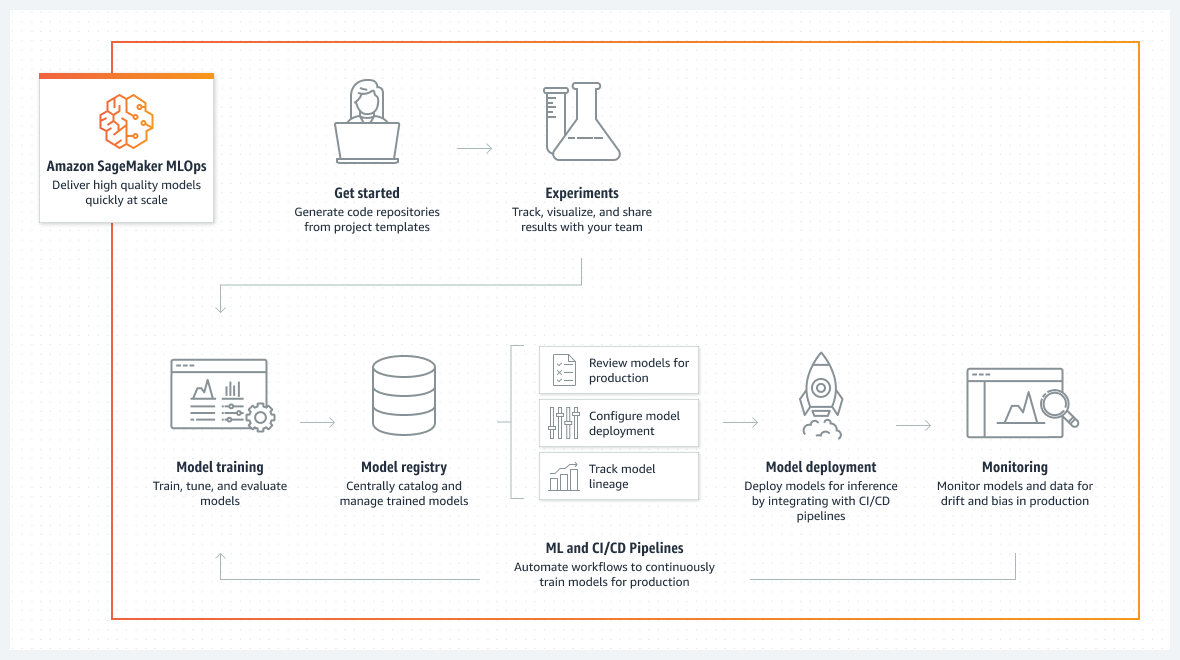

### 2. Pipeline

Pipeline은 기계학습 모델의 전체 수명주기를 구성하는 일련의 단계들을 자동화하고 연결하는 워크플로우입니다. 
전형적인 Pipeline에는 다음과 같은 주요 step들이 포함됩니다:

- Processing_Step
    데이터 전처리, 데이터셋 생성 등의 작업을 수행합니다.
    Scikit-learn, PyTorch, TensorFlow 등을 사용할 수 있습니다.
- Training_Step
    기계학습 모델을 학습시키는 단계입니다.
    다양한 프레임워크(TensorFlow, PyTorch, XGBoost 등)를 사용할 수 있습니다.
- Transform_Step
    배치 변환 작업을 수행합니다. (모델 배치 추론 등)
- Model_Step
    학습된 모델을 모델 레지스트리에 등록하는 단계입니다.
- Register_Model_Step
    학습된 모델과 전처리/추론 로직을 하나의 패키지로 구성하여 새로운 모델로 등록하는 단계입니다.
- Condition_Step
    조건에 따라 분기 로직을 구현할 수 있습니다. (모델 학습 결과를 기준으로 특정 성능 지표 기반의 분기 생성)
- Quality_Check_Step
    데이터나 모델의 품질을 확인하는 단계입니다.
- Lambda_Step
    사용자 지정 코드를 실행할 수 있습니다.

각 단계는 자동화된 작업으로 이루어져 있으며, 이전 단계의 결과물을 다음 단계의 입력으로 전달하는 방식으로 Pipeline이 구축됩니다.

Pipeline을 구축하면 수동으로 진행하는 것보다 일관성과 재현성이 높아집니다. 
또한 CI/CD(Continuous Integration/Deployment) 개념을 도입하여 새로운 데이터가 있을 때마다 자동으로 모델을 재학습하고 배포할 수 있습니다.

### 3. MLflow

MLflow는 오픈소스 기계학습 라이프사이클 관리 플랫폼입니다. 
실험, 프로젝트, 모델 데이터를 중앙 집중적으로 관리하는 기능을 제공합니다. 
이를 통해 여러 데이터 과학자들이 협업하고, 실험 재현성과 모델 버전 관리를 체계적으로 할 수 있습니다.

- 실험 추적 (Tracking)
    MLflow는 실험별로 코드, 데이터, 매개변수, 메트릭 등을 중앙 서버에 기록하고 관리합니다.
    이를 통해 실험 데이터가 분산된 환경에서도 중앙에 집중되어 버전 관리와 공유가 가능합니다.
    또한 시각화 도구를 제공하여 실험 결과를 쉽게 분석하고 비교할 수 있습니다.
- 프로젝트 (Projects)
    MLflow 프로젝트는 코드와 데이터, 실행 환경을 하나의 패키지로 묶어 관리합니다.
    이 프로젝트 패키지는 중앙 저장소에 저장되어 재현 가능한 실행이 가능합니다.
    팀원 간 프로젝트 공유와 협업도 더욱 수월해집니다.
- 모델 레지스트리 (Model Registry)
    학습된 모델과 관련 메타데이터를 중앙 레지스트리에 등록하고 버전 관리할 수 있습니다.
    모델 아티팩트, 코드, 데이터 등이 한 곳에 집중되어 모델 라이프사이클을 추적할 수 있습니다.

# 실습 개요

### 1. MLflow tracking server 생성 실습
### 2. Pipeline 생성 및 MLflow tracking server 연결 실습
### 3. Pipeline 효율적 실행을 위한 추가 기능 실습: Step Caching / Selective Execution

# 1. MLflow tracking server 생성 실습

본 실습에서는 MLflow tracking server를 생성해보고, mlflow UI를 확인해보는 것을 목표로 합니다.

This notebook's CI test result for us-west-2 is as follows. CI test results in other regions can be found at the end of the notebook.

![This us-west-2 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/us-west-2/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

## Updates and Imports

In [1]:
#!pip install -U --quiet boto3

Imports

In [2]:
import json
import sagemaker
import boto3

print(json.__version__)
print(sagemaker.__version__)
print(boto3.__version__)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
2.0.9
2.227.0
1.34.162


Session variables

In [3]:
sess = sagemaker.Session()
bucket_name = sess.default_bucket()
role = sagemaker.get_execution_role()
region = sess.boto_region_name

iam_client = boto3.client("iam")
sts_client = boto3.client("sts")
sm_client = boto3.client("sagemaker")
account_id = sts_client.get_caller_identity()["Account"]
tracking_server_name = "my-tracking-server-test"
mlflow_role_name = "my-mlflow-role-No1"
mlflow_policy_name = "mlflow-s3-sm-model-registry"

print(bucket_name)
print(role)
print(region)

sagemaker-us-east-1-792507293440
arn:aws:iam::792507293440:role/cfnstudiodomain-SageMakerExecutionRole-EjMGMMDy4yHV
us-east-1


In [4]:
# IAMFullAccess 정책 ARN
role_name = role.split('/')[-1]
print("Role name:", role_name)

policy_arn = 'arn:aws:iam::aws:policy/IAMFullAccess'

try:
    # 역할에 정책 연결
    response = iam_client.attach_role_policy(
        RoleName=role_name,
        PolicyArn=policy_arn
    )
    print(f"Successfully attached IAMFullAccess policy to role {role_name}")
except Exception as e:
    print(f"Error attaching policy: {str(e)}")

Role name: cfnstudiodomain-SageMakerExecutionRole-EjMGMMDy4yHV
Successfully attached IAMFullAccess policy to role cfnstudiodomain-SageMakerExecutionRole-EjMGMMDy4yHV


In [5]:
import time

time.sleep(5)

# 정책 문서
policy_document = {
    "Version": "2012-10-17",    
    "Statement": [        
        {            
            "Effect": "Allow",            
            "Action": [
                "sagemaker-mlflow:*",
            ],            
            "Resource": "*"        
        }        
    ]
}

policy_name = 'SageMakerMLflowPolicy'

try:
    # 기존 정책이 있는지 확인
    response = iam_client.get_policy(
        PolicyArn=f"arn:aws:iam::{account_id}:policy/{mlflow_policy_name}"
    )
    print(f"Policy {mlflow_policy_name} already exists")
    
except iam_client.exceptions.NoSuchEntityException:
    # 정책이 없는 경우에만 새로 생성
    response = iam_client.create_policy(
        PolicyName=policy_name,
        PolicyDocument=json.dumps(policy_document)
    )
    
    print(f"Created new policy: {mlflow_policy_name}")

Created new policy: mlflow-s3-sm-model-registry


In [6]:
print(response)

{'Policy': {'PolicyName': 'SageMakerMLflowPolicy', 'PolicyId': 'ANPA3RBI5T4AC2RDPZ45V', 'Arn': 'arn:aws:iam::792507293440:policy/SageMakerMLflowPolicy', 'Path': '/', 'DefaultVersionId': 'v1', 'AttachmentCount': 0, 'PermissionsBoundaryUsageCount': 0, 'IsAttachable': True, 'CreateDate': datetime.datetime(2025, 1, 9, 13, 48, 28, tzinfo=tzlocal()), 'UpdateDate': datetime.datetime(2025, 1, 9, 13, 48, 28, tzinfo=tzlocal())}, 'ResponseMetadata': {'RequestId': 'ee1e66de-c5be-4e1d-ae5e-a87a07b67efd', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Thu, 09 Jan 2025 13:48:28 GMT', 'x-amzn-requestid': 'ee1e66de-c5be-4e1d-ae5e-a87a07b67efd', 'content-type': 'text/xml', 'content-length': '777'}, 'RetryAttempts': 0}}


In [7]:
policy_arn = response["Policy"]["Arn"]

iam_client.attach_role_policy(
    RoleName=role_name,
    PolicyArn=policy_arn
)
print(f"Successfully attached policy to role {role_name}")
        

Successfully attached policy to role cfnstudiodomain-SageMakerExecutionRole-EjMGMMDy4yHV


## MLflow Permissions

### IAM Role for the MLflow Tracking Server

To run the next cell, make sure the IAM role used while running this notebook has permission to create an IAM Role. 
The `iam:CreateRole`, `iam:CreatePolicy`, `iam:ListPolicies`, and `iam:AttachRolePolicy` action must be allowed by the notebook execution role's policy.

If you are running this notebook from SageMaker Studio, you can update your notebook execution role through the following steps: 

1. Navigate to the AWS Console and select the Domain you are using
2. Under the Domain, select the User Profile you are using. You will see the Execution Role listed there.
3. Navigate to the IAM Console, search for the Execution Role under "Roles", and update your role with a policy that allows the `iam:CreateRole`, `iam:CreatePolicy`, `iam:ListPolicies`, and `iam:AttachRolePolicy` actions. 

If you are not using a SageMaker Studio Notebook, confirm that the role you have used to configure your AWS CLI has appropriate permissions to create an IAM role and attach a policy to it. 

Here is an example of an inline policy you can add to your role - 

```json
{
    "Version": "2012-10-17",
    "Statement": [
        {
            "Sid": "Statement1",
            "Effect": "Allow",
            "Action": [
                "iam:ListPolicies",
                "iam:CreatePolicy",
                "iam:CreateRole",
                "iam:AttachRolePolicy"
            ],
            "Resource": [
                "*"
            ]
        }
    ]
}
```

In [8]:
mlflow_trust_policy = {
    "Version": "2012-10-17",
    "Statement": [
        {
            "Effect": "Allow",
            "Principal": {"Service": ["sagemaker.amazonaws.com"]},
            "Action": "sts:AssumeRole",
        }
    ],
}

# Create role for MLflow
try:
    # 기존 역할이 있는지 확인
    existing_role = iam_client.get_role(
    RoleName=mlflow_role_name)
    print(f"Role {mlflow_role_name} already exists")
    mlflow_role = existing_role
except iam_client.exceptions.NoSuchEntityException:
    # 역할이 없는 경우에만 새로 생성
    mlflow_role = iam_client.create_role(
        RoleName=mlflow_role_name,
        AssumeRolePolicyDocument=json.dumps(mlflow_trust_policy)
    )
    print(f"Created new role: {mlflow_role_name}")

Created new role: my-mlflow-role-No1


In [9]:
mlflow_role_arn = mlflow_role["Role"]["Arn"]
print(mlflow_role_arn)

arn:aws:iam::792507293440:role/my-mlflow-role-No1


In [10]:
# Create policy for S3 and SageMaker Model Registry
sm_s3_model_registry_policy = {
    "Version": "2012-10-17",
    "Statement": [
        {
            "Effect": "Allow",
            "Action": [
                "s3:Get*",
                "s3:Put*",
                "s3:List*",
                "sagemaker:AddTags",
                "sagemaker:CreateModelPackageGroup",
                "sagemaker:CreateModelPackage",
                "sagemaker:UpdateModelPackage",
                "sagemaker:DescribeModelPackageGroup",
            ],
            "Resource": "*",
        }
    ],
}

try:
    # 기존 정책이 있는지 확인
    existing_policy = iam_client.get_policy(
        PolicyArn=f"arn:aws:iam::{account_id}:policy/{mlflow_policy_name}"
    )
    print(f"Policy {mlflow_policy_name} already exists")
    mlflow_s3_sm_model_registry_iam_policy = existing_policy
except iam_client.exceptions.NoSuchEntityException:
    # 정책이 없는 경우에만 새로 생성
    mlflow_s3_sm_model_registry_iam_policy = iam_client.create_policy(
        PolicyName=mlflow_policy_name,
        PolicyDocument=json.dumps(sm_s3_model_registry_policy)
    )
    print(f"Created new policy: {mlflow_policy_name}")

Created new policy: mlflow-s3-sm-model-registry


In [11]:
mlflow_s3_sm_model_registry_iam_policy_arn = mlflow_s3_sm_model_registry_iam_policy["Policy"]["Arn"]
print(mlflow_s3_sm_model_registry_iam_policy_arn)

arn:aws:iam::792507293440:policy/mlflow-s3-sm-model-registry


In [12]:
# Attach the policy to the MLflow role
iam_client.attach_role_policy(
    RoleName=mlflow_role_name, PolicyArn=mlflow_s3_sm_model_registry_iam_policy_arn
)

{'ResponseMetadata': {'RequestId': '0e47cd70-3921-4006-b6f6-e68084d61851',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Thu, 09 Jan 2025 13:48:28 GMT',
   'x-amzn-requestid': '0e47cd70-3921-4006-b6f6-e68084d61851',
   'content-type': 'text/xml',
   'content-length': '212'},
  'RetryAttempts': 0}}

Note that your SageMaker execution role should have the following permissions to call Mlflow REST APIs:

```json
{
    "Version": "2012-10-17",    
    "Statement": [        
        {            
            "Effect": "Allow",            
            "Action": [
                "sagemaker-mlflow:*",
                "sagemaker:CreateMlflowTrackingServer",
                "sagemaker:UpdateMlflowTrackingServer",
                "sagemaker:DeleteMlflowTrackingServer",
                "sagemaker:StartMlflowTrackingServer",
                "sagemaker:StopMlflowTrackingServer",
                "sagemaker:CreatePresignedMlflowTrackingServerUrl"
            ],            
            "Resource": "*"        
        }        
    ]
}
```

## Create MLflow Tracking Server

In [13]:
sm_client.create_mlflow_tracking_server(
    TrackingServerName=tracking_server_name,
    ArtifactStoreUri=f"s3://{bucket_name}/{tracking_server_name}",
    TrackingServerSize="Small",
    MlflowVersion="2.13.2",
    RoleArn=mlflow_role_arn,
    AutomaticModelRegistration=False,
)

{'TrackingServerArn': 'arn:aws:sagemaker:us-east-1:792507293440:mlflow-tracking-server/my-tracking-server-test',
 'ResponseMetadata': {'RequestId': '4fa01bb4-5640-4b1c-ba1d-2592c9d7c94a',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '4fa01bb4-5640-4b1c-ba1d-2592c9d7c94a',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '111',
   'date': 'Thu, 09 Jan 2025 13:48:28 GMT'},
  'RetryAttempts': 0}}

In [14]:
tracking_server_arn = (
    f"arn:aws:sagemaker:{region}:{account_id}:mlflow-tracking-server/{tracking_server_name}"
)

Amazon SageMaker의 MLflow 트래킹 서버의 구성 및 상세 정보를 확인

In [15]:
sm_client.describe_mlflow_tracking_server(TrackingServerName=tracking_server_name)

{'TrackingServerArn': 'arn:aws:sagemaker:us-east-1:792507293440:mlflow-tracking-server/my-tracking-server-test',
 'TrackingServerName': 'my-tracking-server-test',
 'ArtifactStoreUri': 's3://sagemaker-us-east-1-792507293440/my-tracking-server-test',
 'TrackingServerSize': 'Small',
 'MlflowVersion': '2.13.2',
 'RoleArn': 'arn:aws:iam::792507293440:role/my-mlflow-role-No1',
 'TrackingServerStatus': 'Creating',
 'IsActive': 'Inactive',
 'TrackingServerUrl': 'https://t-5nl7emsww1w9.us-east-1.experiments.sagemaker.aws',
 'WeeklyMaintenanceWindowStart': 'Sun:01:24',
 'AutomaticModelRegistration': False,
 'CreationTime': datetime.datetime(2025, 1, 9, 13, 48, 29, 484000, tzinfo=tzlocal()),
 'CreatedBy': {'UserProfileArn': 'arn:aws:sagemaker:us-east-1:792507293440:user-profile/d-pmiwhek24qtr/studio-user',
  'UserProfileName': 'studio-user',
  'DomainId': 'd-pmiwhek24qtr'},
 'LastModifiedTime': datetime.datetime(2025, 1, 9, 13, 48, 29, 484000, tzinfo=tzlocal()),
 'LastModifiedBy': {'UserProfileAr

Install the MLflow SDK and our MLflow AWS Plugin (SageMaker Studio Space에서는 생략 가능)

In [16]:
#!pip install --quiet mlflow==2.13.2 sagemaker-mlflow==0.1.0

## MLflow tracking test

Connect to tracking server

In [17]:
import mlflow

mlflow.set_tracking_uri(tracking_server_arn)

Log a metric (mlflow tracking server 생성 완료 후 실행)

In [18]:
with mlflow.start_run():
    mlflow.log_metric("foo", 1)

MlflowException: API request to endpoint /api/2.0/mlflow/runs/create failed with error code 403 != 200. Response body: 'User: arn:aws:sts::792507293440:assumed-role/cfnstudiodomain-SageMakerExecutionRole-EjMGMMDy4yHV/SageMaker is not authorized to perform: sagemaker-mlflow:CreateRun on resource: arn:aws:sagemaker:us-east-1:792507293440:mlflow-tracking-server/my-tracking-server-test because no identity-based policy allows the sagemaker-mlflow:CreateRun action'

See results in MLflow UI. You can either launch the MLflow UI from within SageMaker Studio, or generate a pre-signed URL like this:

In [ ]:
sm_client.create_presigned_mlflow_tracking_server_url(TrackingServerName=tracking_server_name)

## Notebook CI Test Results

This notebook was tested in multiple regions. The test results are as follows, except for us-west-2 which is shown at the top of the notebook.


![This us-east-1 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/us-east-1/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This us-east-2 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/us-east-2/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This us-west-1 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/us-west-1/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This ca-central-1 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/ca-central-1/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This sa-east-1 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/sa-east-1/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This eu-west-1 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/eu-west-1/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This eu-west-2 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/eu-west-2/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This eu-west-3 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/eu-west-3/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This eu-central-1 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/eu-central-1/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This eu-north-1 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/eu-north-1/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This ap-southeast-1 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/ap-southeast-1/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This ap-southeast-2 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/ap-southeast-2/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This ap-northeast-1 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/ap-northeast-1/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This ap-northeast-2 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/ap-northeast-2/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)

![This ap-south-1 badge failed to load. Check your device's internet connectivity, otherwise the service is currently unavailable](https://prod.us-west-2.tcx-beacon.docs.aws.dev/sagemaker-nb/ap-south-1/sagemaker-mlflow|sagemaker_mlflow_setup.ipynb)